In [21]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def load_and_process_data(file_path):
    """Load data and extract relevant components (first 3 components of each segment)"""
    data = np.loadtxt(file_path)
    time = data[:, 0]
    # Remove time column and reshape to (time_steps, n_segments, 6)
    values = data[:, 1:].reshape(data.shape[0], -1, 6)
    # Keep only first 3 components
    return time, values[:, :, :3]

def calculate_dissipation(forces, velocities):
    """Calculate viscous dissipation as dot product of forces and velocities"""
    # Sum over segments and vector components
    return np.sum(forces * velocities, axis=(1, 2))

# Base directory for data
base_dir = Path('../data')

# Lists to store results
results = []

# Scan through directories
for dir_name in base_dir.glob('frequency_sweep_*'):
    print(f'Processing {dir_name}')
    N = int(dir_name.name.split('_')[-1])
    
    # Get all date subdirectories
    date_dirs = list(dir_name.glob('*'))
    if not date_dirs:
        continue
        
    # Process each date directory
    for data_dir in date_dirs:
        print(f'Processing {data_dir}')
        # Process all matching files in this directory
        for force_file in data_dir.glob('*_seg_forces.dat'):
            print(f'Processing {force_file}')
            # Extract frequency shift from filename
            fname = force_file.name
            f = float(fname.split('freqshift_')[0].split('_')[-1])
            
            # Construct velocity filename
            vel_file = force_file.parent / fname.replace('seg_forces', 'seg_vels')
            
            if vel_file.exists():
                # Load force and velocity data
                _, forces = load_and_process_data(force_file)
                _, velocities = load_and_process_data(vel_file)
                
                # Calculate dissipation at each timestep and take mean
                R = np.mean(calculate_dissipation(forces, velocities))
                
                # Store results
                results.append({
                    'N': N,
                    'f': f,
                    'R_per_N': R/N
                })

Processing ../data/frequency_sweep_310
Processing ../data/frequency_sweep_310/20250204
Processing ../data/frequency_sweep_310/20250204/ciliate_310fil_9000blob_8.00R_0.0010torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_seg_forces.dat
Processing ../data/frequency_sweep_310/20250204/ciliate_310fil_9000blob_8.00R_0.0010torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0364freqshift_seg_forces.dat
Processing ../data/frequency_sweep_310/20250204/ciliate_310fil_9000blob_8.00R_0.0010torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0727freqshift_seg_forces.dat
Processing ../data/frequency_sweep_310/20250204/ciliate_310fil_9000blob_8.00R_0.0010torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.1091freqshift_seg_forces.dat
Processing ../data/frequency_sweep_310/20250204/ciliate_310fil_9000blob_8.00R_0.0010torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.1455freqshift_seg_forces.dat
Processing ../data/frequency_sweep_310/20250204/ciliate_310fil_9000blob_8.00R_0.0010torsion_0.2182tilt_0.3000f_eff_1.4

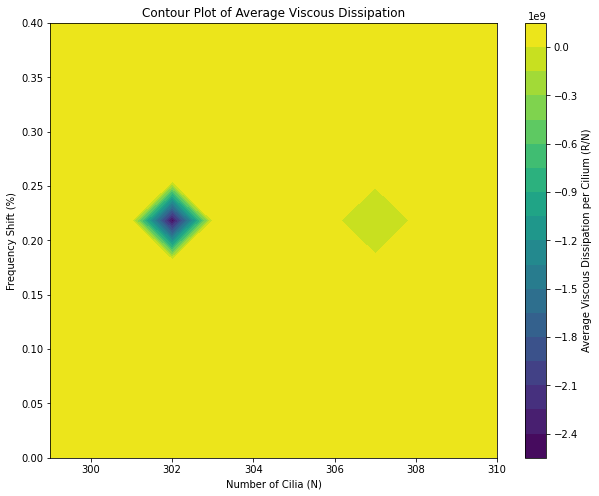

In [22]:
# Convert results to numpy arrays
results = np.array([(d['N'], d['f'], d['R_per_N']) for d in results])
N_values = np.unique(results[:, 0])
f_values = np.unique(results[:, 1])

# Create grid for contour plot
N_grid, f_grid = np.meshgrid(N_values, f_values)
R_grid = np.zeros_like(N_grid)

# Fill the grid with values
for i, f in enumerate(f_values):
  for j, N in enumerate(N_values):
    mask = (results[:, 0] == N) & (results[:, 1] == f)
    if np.any(mask):
      R_grid[i, j] = results[mask, 2][0]

# Create contour plot
plt.figure(figsize=(10, 8))
contour = plt.contourf(N_grid, f_grid, R_grid, levels=20, cmap='viridis')
plt.colorbar(contour, label='Average Viscous Dissipation per Cilium (R/N)')
plt.xlabel('Number of Cilia (N)')
plt.ylabel('Frequency Shift (%)')
plt.title('Contour Plot of Average Viscous Dissipation')
plt.show()

In [40]:
results_wo_outliers = np.array([])

for datapoint in results:
    if datapoint[0] == 310 and datapoint[1] == 0.2182 or datapoint[0] == 302 and datapoint[1] == 0.2182 or datapoint[0] == 307 and datapoint[1] == 0.2182 or datapoint[0] == 300 and datapoint[1] == 0.4:
        pass
    else:
        results_wo_outliers = np.append(results_wo_outliers, datapoint)
results_wo_outliers = results_wo_outliers.reshape(-1, 3)

# Calculate the average of the third column of results_wo_outliers
average_R = np.mean(results_wo_outliers[:, 2])
results_wo_outliers = np.array([])

for datapoint in results:
    if datapoint[0] == 310 and datapoint[1] == 0.2182 or datapoint[0] == 302 and datapoint[1] == 0.2182 or datapoint[0] == 307 and datapoint[1] == 0.2182 or datapoint[0] == 300 and datapoint[1] == 0.4:
        results_wo_outliers = np.append(results_wo_outliers, [datapoint[0], datapoint[1], average_R])
    else:
        results_wo_outliers = np.append(results_wo_outliers, datapoint)
results_wo_outliers = results_wo_outliers.reshape(-1, 3)

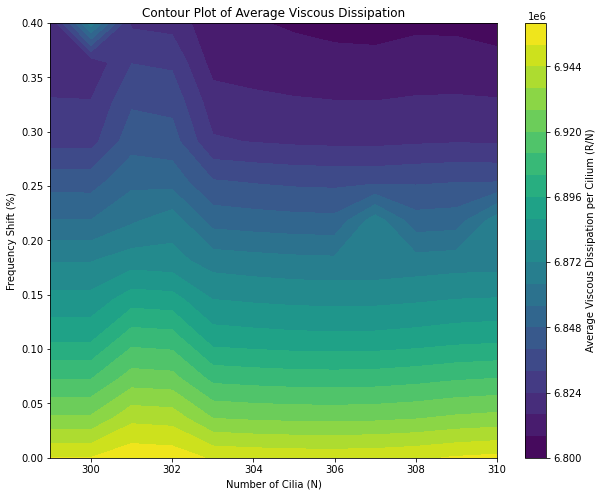

In [41]:
# Convert results to numpy arrays
N_values = np.unique(results_wo_outliers[:, 0])
f_values = np.unique(results_wo_outliers[:, 1])

# Create grid for contour plot
N_grid, f_grid = np.meshgrid(N_values, f_values)
R_grid = np.zeros_like(N_grid)

# Fill the grid with values
for i, f in enumerate(f_values):
  for j, N in enumerate(N_values):
    mask = (results_wo_outliers[:, 0] == N) & (results_wo_outliers[:, 1] == f)
    if np.any(mask):
      R_grid[i, j] = results_wo_outliers[mask, 2][0]

# Create contour plot
plt.figure(figsize=(10, 8))
contour = plt.contourf(N_grid, f_grid, R_grid, levels=20, cmap='viridis')
plt.colorbar(contour, label='Average Viscous Dissipation per Cilium (R/N)')
plt.xlabel('Number of Cilia (N)')
plt.ylabel('Frequency Shift (%)')
plt.title('Contour Plot of Average Viscous Dissipation')
plt.show()